In [1]:
# Import our dependencies
import hvplot.pandas
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
#  Import and read the charity_data.csv.
import pandas as pd 


In [2]:
QB_df = df[df.Pos=='QB']
QB_df.head()


,Player,Pos,School,AP Ranking,Ht,Wt,40yd,Vertical,Bench,Broad Jump,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ
19,Tom Brady,QB,Michigan,8.0,4-Jun,211,5.28,24.5,NaN,99.0,...,523.0,939.0,17.0,2.0,59.0,0.0,9.0,NaN,NaN,Michigan
24,Marc Bulger,QB,West Virginia,26.0,2-Jun,208,4.97,NaN,NaN,100.0,...,118.0,300.0,8.0,4.0,21.0,0.0,5.0,NaN,NaN,West Virginia
29,Giovanni Carmazzi,QB,Hofstra,26.0,3-Jun,224,4.74,36.5,NaN,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hofstra
74,Joe Hamilton,QB,Georgia Tech,11.0,10-May,192,4.81,NaN,NaN,106.0,...,1.0,-2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Georgia Tech
83,Todd Husak,QB,Stanford,NaN,3-Jun,216,5.20,27.5,NaN,99.0,...,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Stanford


In [3]:
df_new = QB_df[['Player','cmp', 'rnd']]
df_new

,Player,cmp,rnd
19,Tom Brady,5098.0,6
24,Marc Bulger,1969.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,0.0,7
83,Todd Husak,2.0,6
...,...,...,...
3385,Brett Hundley,2.0,5
3410,Sean Mannion,6.0,3
3411,Marcus Mariota,458.0,1
3437,Bryce Petty,21.0,4


In [4]:
df_new = df_new.dropna()
df_new

,Player,cmp,rnd
19,Tom Brady,5098.0,6
24,Marc Bulger,1969.0,6
74,Joe Hamilton,0.0,7
83,Todd Husak,2.0,6
88,Jarious Jackson,11.0,7
...,...,...,...
3385,Brett Hundley,2.0,5
3410,Sean Mannion,6.0,3
3411,Marcus Mariota,458.0,1
3437,Bryce Petty,21.0,4


In [5]:

# percent=np.arange(0,6000,500)
# cmp=df_new['cmp']
# round=df_new['rnd']
# plt.scatter(cmp,round,)
# plt.xlim(20, 40)
# plt.xticks(percent, rotation=90)
# plt.xlabel('Completions')
# plt.ylabel('Round Selected')

# # plt.savefig('../static/Images/Obesity_vs_Income.png', format="png")
# plt.show()


df_new.hvplot.scatter(
    x="cmp",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [cmp]   (rnd,Player)

In [6]:
df_new = QB_df[['Player','pass_att', 'rnd']]
df_new

,Player,pass_att,rnd
19,Tom Brady,7998.0,6
24,Marc Bulger,3171.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,0.0,7
83,Todd Husak,2.0,6
...,...,...,...
3385,Brett Hundley,7.0,5
3410,Sean Mannion,7.0,3
3411,Marcus Mariota,725.0,1
3437,Bryce Petty,34.0,4


In [7]:
df_new = df_new.dropna()
df_new

,Player,pass_att,rnd
19,Tom Brady,7998.0,6
24,Marc Bulger,3171.0,6
74,Joe Hamilton,0.0,7
83,Todd Husak,2.0,6
88,Jarious Jackson,22.0,7
...,...,...,...
3385,Brett Hundley,7.0,5
3410,Sean Mannion,7.0,3
3411,Marcus Mariota,725.0,1
3437,Bryce Petty,34.0,4


In [8]:
# percent=np.arange(0,8500,500)
# cmp=df_new['pass_att']
# round=df_new['rnd']
# plt.scatter(cmp,round,)
# plt.xlim(20, 40)
# plt.xticks(percent, rotation=90)
# plt.xlabel('Pass Attempts')
# plt.ylabel('Round Selected')

# # plt.savefig('../static/Images/Obesity_vs_Income.png', format="png")
# plt.show()

df_new.hvplot.scatter(
    x="pass_att",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [pass_att]   (rnd,Player)

In [9]:
df_new = QB_df[['Player','pass_td', 'rnd']]
df_new

,Player,pass_td,rnd
19,Tom Brady,444.0,6
24,Marc Bulger,122.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,0.0,7
83,Todd Husak,0.0,6
...,...,...,...
3385,Brett Hundley,0.0,5
3410,Sean Mannion,0.0,3
3411,Marcus Mariota,42.0,1
3437,Bryce Petty,1.0,4


In [10]:
df_new = df_new.dropna()
df_new

,Player,pass_td,rnd
19,Tom Brady,444.0,6
24,Marc Bulger,122.0,6
74,Joe Hamilton,0.0,7
83,Todd Husak,0.0,6
88,Jarious Jackson,0.0,7
...,...,...,...
3385,Brett Hundley,0.0,5
3410,Sean Mannion,0.0,3
3411,Marcus Mariota,42.0,1
3437,Bryce Petty,1.0,4


In [11]:
# percent=np.arange(0,600,500)
# cmp=df_new['pass_td']
# round=df_new['rnd']
# plt.scatter(cmp,round,)
# plt.xlim(20, 40)
# plt.xticks(percent, rotation=90)
# plt.xlabel('Pass TD')
# plt.ylabel('Round Selected')

# # plt.savefig('../static/Images/Obesity_vs_Income.png', format="png")
# plt.show()

df_new.hvplot.scatter(
    x="pass_td",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [pass_td]   (rnd,Player)

In [12]:
df_new = QB_df[['Player','pass_yds', 'rnd']]
df_new

,Player,pass_yds,rnd
19,Tom Brady,59943.0,6
24,Marc Bulger,22814.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,0.0,7
83,Todd Husak,-2.0,6
...,...,...,...
3385,Brett Hundley,17.0,5
3410,Sean Mannion,31.0,3
3411,Marcus Mariota,5590.0,1
3437,Bryce Petty,182.0,4


In [13]:
df_new = df_new.dropna()
df_new

,Player,pass_yds,rnd
19,Tom Brady,59943.0,6
24,Marc Bulger,22814.0,6
74,Joe Hamilton,0.0,7
83,Todd Husak,-2.0,6
88,Jarious Jackson,114.0,7
...,...,...,...
3385,Brett Hundley,17.0,5
3410,Sean Mannion,31.0,3
3411,Marcus Mariota,5590.0,1
3437,Bryce Petty,182.0,4


In [14]:
df_new.hvplot.scatter(
    x="pass_yds",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [pass_yds]   (rnd,Player)

In [15]:
df_new = QB_df[['Player','pass_int', 'rnd']]
df_new

,Player,pass_int,rnd
19,Tom Brady,151.0,6
24,Marc Bulger,93.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,0.0,7
83,Todd Husak,0.0,6
...,...,...,...
3385,Brett Hundley,1.0,5
3410,Sean Mannion,0.0,3
3411,Marcus Mariota,18.0,1
3437,Bryce Petty,1.0,4


In [16]:
df_new = df_new.dropna()
df_new

,Player,pass_int,rnd
19,Tom Brady,151.0,6
24,Marc Bulger,93.0,6
74,Joe Hamilton,0.0,7
83,Todd Husak,0.0,6
88,Jarious Jackson,1.0,7
...,...,...,...
3385,Brett Hundley,1.0,5
3410,Sean Mannion,0.0,3
3411,Marcus Mariota,18.0,1
3437,Bryce Petty,1.0,4


In [17]:
df_new.hvplot.scatter(
    x="pass_int",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [pass_int]   (rnd,Player)

In [18]:
df_new = QB_df[['Player','rush_yds', 'rnd']]
df_new

,Player,rush_yds,rnd
19,Tom Brady,939.0,6
24,Marc Bulger,300.0,6
29,Giovanni Carmazzi,NaN,3
74,Joe Hamilton,-2.0,7
83,Todd Husak,-1.0,6
...,...,...,...
3385,Brett Hundley,0.0,5
3410,Sean Mannion,NaN,3
3411,Marcus Mariota,516.0,1
3437,Bryce Petty,NaN,4


In [19]:
df_new = df_new.dropna()
df_new

,Player,rush_yds,rnd
19,Tom Brady,939.0,6
24,Marc Bulger,300.0,6
74,Joe Hamilton,-2.0,7
83,Todd Husak,-1.0,6
88,Jarious Jackson,15.0,7
...,...,...,...
3197,Zach Mettenberger,12.0,6
3235,Tom Savage,-6.0,4
3385,Brett Hundley,0.0,5
3411,Marcus Mariota,516.0,1


In [20]:
df_new.hvplot.scatter(
    x="rush_yds",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"]
)

:Scatter   [rush_yds]   (rnd,Player)

In [21]:
df_QB_stat = QB_df[['Player','cmp', 'pass_att','pass_yds','pass_td','pass_int','rush_yds','rnd']]
df_QB_stat

,Player,cmp,pass_att,pass_yds,pass_td,pass_int,rush_yds,rnd
19,Tom Brady,5098.0,7998.0,59943.0,444.0,151.0,939.0,6
24,Marc Bulger,1969.0,3171.0,22814.0,122.0,93.0,300.0,6
29,Giovanni Carmazzi,NaN,NaN,NaN,NaN,NaN,NaN,3
74,Joe Hamilton,0.0,0.0,0.0,0.0,0.0,-2.0,7
83,Todd Husak,2.0,2.0,-2.0,0.0,0.0,-1.0,6
...,...,...,...,...,...,...,...,...
3385,Brett Hundley,2.0,7.0,17.0,0.0,1.0,0.0,5
3410,Sean Mannion,6.0,7.0,31.0,0.0,0.0,NaN,3
3411,Marcus Mariota,458.0,725.0,5590.0,42.0,18.0,516.0,1
3437,Bryce Petty,21.0,34.0,182.0,1.0,1.0,NaN,4


In [22]:
df_QB_stat['QB_Rating']=((df_QB_stat['pass_yds']*8.4) + (df_QB_stat['pass_td']*330) - (df_QB_stat['pass_int']*200) + (df_QB_stat['cmp']*100))/df_QB_stat['pass_att']
df_QB_stat

C:\Users\Bryan\AppData\Local\Temp\ipykernel_14492\887352862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QB_stat['QB_Rating']=((df_QB_stat['pass_yds']*8.4) + (df_QB_stat['pass_td']*330) - (df_QB_stat['pass_int']*200) + (df_QB_stat['cmp']*100))/df_QB_stat['pass_att']


,Player,cmp,pass_att,pass_yds,pass_td,pass_int,rush_yds,rnd,QB_Rating
19,Tom Brady,5098.0,7998.0,59943.0,444.0,151.0,939.0,6,141.240460
24,Marc Bulger,1969.0,3171.0,22814.0,122.0,93.0,300.0,6,129.359067
29,Giovanni Carmazzi,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
74,Joe Hamilton,0.0,0.0,0.0,0.0,0.0,-2.0,7,NaN
83,Todd Husak,2.0,2.0,-2.0,0.0,0.0,-1.0,6,91.600000
...,...,...,...,...,...,...,...,...,...
3385,Brett Hundley,2.0,7.0,17.0,0.0,1.0,0.0,5,20.400000
3410,Sean Mannion,6.0,7.0,31.0,0.0,0.0,NaN,3,122.914286
3411,Marcus Mariota,458.0,725.0,5590.0,42.0,18.0,516.0,1,142.091034
3437,Bryce Petty,21.0,34.0,182.0,1.0,1.0,NaN,4,110.552941


In [23]:
df_QB_stat = df_QB_stat.dropna()
df_QB_stat1 = df_QB_stat[df_QB_stat.Player!='Ryan Nassib']

In [24]:
df_QB_stat1.hvplot.scatter(
    x="QB_Rating",
    y="rnd",
    # by="clusters",
    hover_cols = ["Player"])

:Scatter   [QB_Rating]   (rnd,Player)

In [25]:
# Split our preprocessed data into our features and target arrays
X = df_QB_stat.drop(['Player','QB_Rating'], axis=1)
y = df_QB_stat['rnd']-1


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)

In [26]:
y_test.unique()

array([0, 2, 3, 1, 5, 6, 4], dtype=int64)

In [27]:
num_classes = 7
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]



array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 100
# hidden_nodes_layer3 = 40

nn_model = tf.keras.models.Sequential()


# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

# nn_model.add(tf.keras.layers.Dense(
#     units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 7)                 707       
                                                                 
Total params: 11607 (45.34 KB)
Trainable params: 11607 (45.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile the model
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150


3/3 [==============================] - 1s 6ms/step - loss: 2.0444 - accuracy: 0.0426
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 1.9180 - accuracy: 0.3191
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 1.8097 - accuracy: 0.4787
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 1.7250 - accuracy: 0.5426
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 1.6585 - accuracy: 0.5532
Epoch 6/150
3/3 [==============================] - 0s 3ms/step - loss: 1.5944 - accuracy: 0.5532
Epoch 7/150
3/3 [==============================] - 0s 4ms/step - loss: 1.5367 - accuracy: 0.5745
Epoch 8/150
3/3 [==============================] - 0s 5ms/step - loss: 1.4820 - accuracy: 0.5851
Epoch 9/150
3/3 [==============================] - 0s 4ms/step - loss: 1.4300 - accuracy: 0.5851
Epoch 10/150
3/3 [==============================] - 0s 4ms/step - loss: 1.3770 - accuracy: 0.6383
Epoch 11/150
3/3 [=======================

In [32]:
# Evaluate the model using the training data 
# Make sure you evaluate the scaled data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.1923 - accuracy: 0.9688 - 209ms/epoch - 209ms/step
Loss: 0.19229713082313538, Accuracy: 0.96875


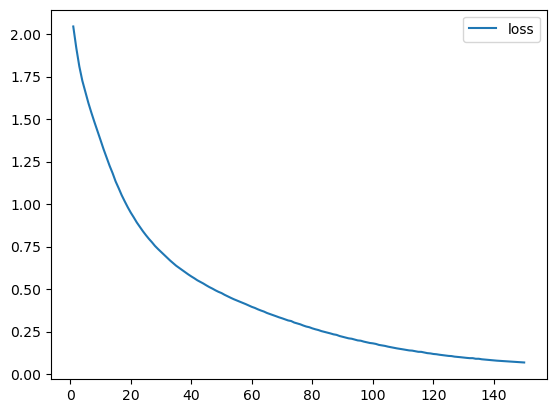

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

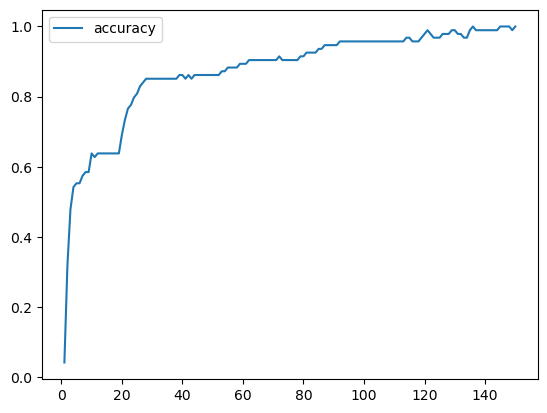

In [34]:
history_df.plot(y="accuracy")
plt.show()